In [1]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from scipy.stats.distributions import norm

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

(-4.5, 3.5)

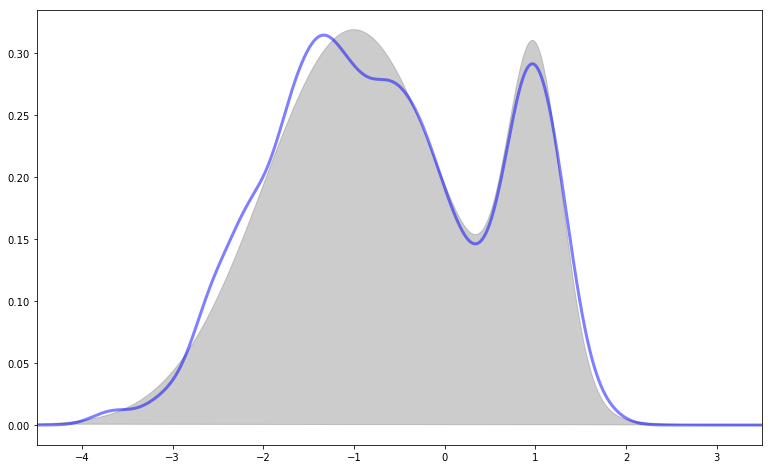

In [6]:
# The grid we'll use for plotting
x_grid = np.linspace(-4.5, 3.5, 1000)

# Draw points from a bimodal distribution in 1D
np.random.seed(0)
x = np.concatenate([norm(-1, 1.).rvs(400),
                    norm(1, 0.3).rvs(100)])
pdf_true = (0.8 * norm(-1, 1).pdf(x_grid) +
            0.2 * norm(1, 0.3).pdf(x_grid))

# Plot the three kernel density estimates
fig, ax = plt.subplots(figsize=(13, 8))
fig.subplots_adjust(wspace=0)

pdf = kde_scipy(x, x_grid, bandwidth=0.2)
ax.plot(x_grid, pdf, color='blue', alpha=0.5, lw=3)
ax.fill(x_grid, pdf_true, ec='gray', fc='gray', alpha=0.4)
ax.set_xlim(-4.5, 3.5)

In [12]:
norm(-1, 1.).rvs(4)

array([-1.55430963, -1.47063766, -1.21694957, -0.55460675])

In [13]:
pdf_true.shape

(1000,)

In [14]:
x.shape

(500,)

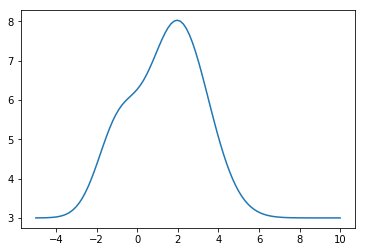

In [15]:

from math import sqrt, pi
from numpy import exp, zeros_like, linspace
import matplotlib.pylab as plt

def N(x, A, c, mu, sigma):
    return A * exp(-(x-mu)**2/(2.*sigma**2)) + c

def s(x, parameters):
    out = zeros_like(x)
    for (A, c, mu, sigma) in parameters:
        out += N(x, A, c, mu, sigma)
    return out
true_parameters = [(2, 2, -1, 1), (5, 1, 2, 1.5)]
x = linspace(-5, 10, 100)
sum = s(x, true_parameters)
plt.plot(x, sum)
plt.figure()
plt.show()

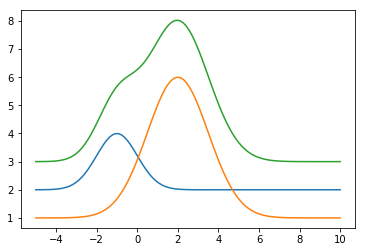

In [18]:

for (A, c, mu, sigma) in true_parameters:
    plt.plot(x, N(x, A, c, mu, sigma))
plt.plot(x, sum)
plt.show()

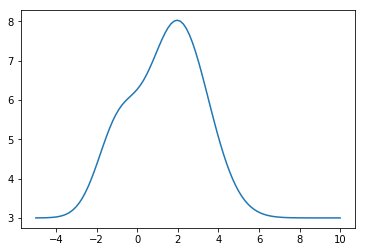

In [19]:
from scipy.optimize import leastsq

def residuals(parametersflat, y, x):
    parameters = [tuple(r) for r in parametersflat.reshape((2,4))]
    return y - s(x, parameters)

y_meas = s(x, true_parameters)
# True parameters = [(2, 2, -1, 1), (5, 1, 2, 1.5)]
p0 = [1.9, 2.2, -0.8, 1.3, 4.8, 1.3, 1.8, 1.8]
p = leastsq(residuals, p0, args=(y_meas, x))[0]
fit = s(x, [tuple(r) for r in p.reshape((2,4))])
plt.plot(x, fit)
plt.show()

In [26]:
[tuple(r) for r in np.array(p0).reshape((2,4))]

[(1.8999999999999999, 2.2000000000000002, -0.80000000000000004, 1.3),
 (4.7999999999999998, 1.3, 1.8, 1.8)]

In [20]:
print 'Actual paramaters'
print true_parameters; print
print 'Computed parameters'
print p

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-20-514a188cdb1e>, line 1)

In [23]:
y_meas

array([ 3.00076425,  3.00136466,  3.00238826,  3.00409426,  3.0068727 ,
        3.01129273,  3.01815863,  3.0285692 ,  3.04397278,  3.06620611,
        3.09750189,  3.14044789,  3.19788088,  3.27270367,  3.36762271,
        3.48481775,  3.62557227,  3.78991036,  3.97629968,  4.18148513,
        4.40051161,  4.62697428,  4.85350247,  5.07244316,  5.27666981,
        5.46040976,  5.61996753,  5.75422686,  5.86484227,  5.95607642,
        6.03429529,  6.10718713,  6.18281341,  6.26862277,  6.37055833,
        6.49236734,  6.63518475,  6.79741825,  6.97491964,  7.16139348,
        7.34897266,  7.52888325,  7.69212478,  7.83010518,  7.9351859 ,
        8.00110997,  8.0233011 ,  7.99903342,  7.92748006,  7.80965381,
        7.64825622,  7.44745348,  7.21259795,  6.94991487,  6.66617325,
        6.36835957,  6.06337089,  5.75774185,  5.457417  ,  5.16757598,
        4.89251548,  4.63558777,  4.39919222,  4.18481328,  3.99309636,
        3.82395174,  3.67667645,  3.55008427,  3.44263554,  3.35

In [22]:
true_parameters

[(2, 2, -1, 1), (5, 1, 2, 1.5)]

In [24]:
p

array([  2.00000000e+00,   1.18203679e+04,  -1.00000000e+00,
         1.00000000e+00,   5.00000000e+00,  -1.18173679e+04,
         2.00000000e+00,   1.50000000e+00])